In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def d1(S,K,T,r,sigma):
    return (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))

def d2(S,K,T,r,sigma):
    return (np.log(S/K)+(r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))

def call(S,K,T,r,sigma):
    d_1 = d1(S,K,T,r,sigma) 
    d_2 = d2(S,K,T,r,sigma) 
    return S*stats.norm.cdf(d_1) - K*np.exp(-r*T)*stats.norm.cdf(d_2)

def put(S,K,T,r,sigma):
    d_1 = d1(S,K,T,r,sigma) 
    d_2 = d2(S,K,T,r,sigma) 
    return -S*stats.norm.cdf(-d_1) + K*np.exp(-r*T)*stats.norm.cdf(-d_2)

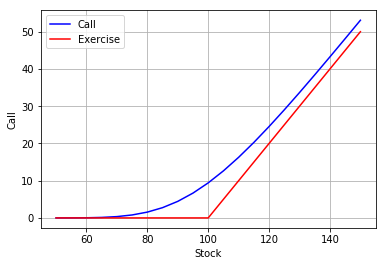

In [10]:
# Black-Scholes formula - Call

import numpy as np
import matplotlib.pyplot as plt

S=np.arange(50,155,5); K=100; T=1; r=0.03; v=0.2;

# Plot of call option price
C=call(S,K,T,r,v); 
plt.plot(S,C,'-b',label='Call')

# Plot of call option payoff at maturity
S1=np.sort(np.concatenate((S, np.array([K])), axis=0)); C1=np.maximum(S1-K,0); 
plt.plot(S1,C1,'-r',label='Exercise'); 
plt.xlabel('Stock'); plt.ylabel('Call'); plt.legend()
plt.grid(True)
plt.show()

# Put-Call Parity

$$
C-P=S-Ke^{-rT}
$$

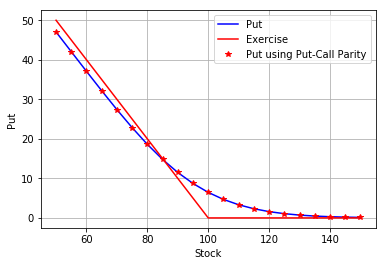

In [16]:
# Black-Scholes formula - Put

import numpy as np

# Plot of put option price
P=put(S,K,T,r,v); 
plt.plot(S,P,'-b',label='Put')

# Plot of put option payoff at maturity
S1=np.sort(np.concatenate((S, np.array([K])), axis=0)); P1=np.maximum(K-S1,0); 
plt.plot(S1,P1,'-r',label='Exercise');

# Check - Compute put price using put call parity
P2=C-S+K*np.exp(-r*T);
plt.plot(S,P2,'*r',label='Put using Put-Call Parity');
plt.xlabel('Stock'); plt.ylabel('Put'); plt.legend()
plt.grid(True)
plt.show()